<p style="text-align:left;">
    M1 Biostatistic/MIND
    <span style="float:right;">
        April 2021
    </span>
</p>
Authors: Jalal Sakher, Elucson Jean-Baptiste, Ayoub Aarab and Nathan Esteve

*********************




![HMMA238](../Game_picture/Front_presentation.png)

Game2048 is a Python$3$ package devellope in HMMA238 course. this package is separated in two part:
+ Classical 2048 game
+ Mathematics résult and strategies comparaisons.

With this package you can play at the 2048 game in the terminal or in a visual game developed with Tkinter package. You can also see IA playing, put them in duel and compare their strategies the 4 strategies available are: random movement, clockwise movement,  opposite movement and adjacent movement.   

The second part of the package is dedicate to mathematics result.  
You can compute a large number of game and compare them with our data base, (more than $300000$ game analysed)  

## 1. The 2048 Game <a name="gen"></a>
### A. Quick presentation <a name="about"></a>

2048 Game is a game developped by Gabriele Cirulli in 2014 and publish on Github. In this game you are face to a 4x4 grid, you have to match the identical power of 2 display on the grid. When you match two power of 2 you get the following power of two, your goal is to reach 2048.  To combine 2 same number you have 4 moove, up, down, left and right when you select a direction all cell are tranlate in this direction. After each moove a random cell fill up with a 2 or 4.The probability of the occurrence of a 4 is $ \frac{1}{10} $ and the maximum power of two that you can theoricaly get is $2 ^{17} $.


### B. Visual game <a name="about"></a>
In this package you can play at this game in a collored grid (colour blind mode availlable). If you chose this game mode a pop up windown appeared. The command are simple and designed to be comfortable playing on AZERTY keyboard configuration.  
Z + ENTER to swip up    
S + ENTER to swip down  
Q + ENTER to swip left    
D + ENTER to swip right  
In this game you are in competition with two IA playing the clockwise and random strategy. Their scores are display on the right, your score on the left.
Be carrefull the IA could be lucky and get a score thats hard to beat ! (At the begin of the game we launch 2 algorithm that play before you)

![Humanplay](../Game_picture/Human_playing.gif)

### C. Console game <a name="about"></a>
if you prefer the simplicity and sobriety of the terminal you can lunch game and play directly in the prompt.  
+ Try the 3x3 grid, alternative of the game called in this module Game6561, sames rules but this time theirs will be power of 3 on the grid!  
+ You can also have a demonstration of random IA playing in the terminal.
+ Use the versus function to see two IA playing strategies that you decide, at the end of their duel see their scores and compare them  
  with the average score of each strategies.

![versusIA](../Game_picture/versus.png)

## 2. Mathematics results <a name="gen"></a>

We have 4 strategies to compare, so to begin we will launch a large number of game and see the result for each strategies. We dont know the law but we will try to get the epirical mean and empirical standar deviation. So we launch 300 000 game for each strategies and store them in .txt file. The goal is to see the distribution of the score and the proportion of maxium cell that each strategies got. We compute all the data to find the accurate possible mean and standard deviation with all strategy we see that when number of data increases the mean score semms to converge.  
We will use the law of large number and the Central limit theorem to construct confidence interval to estimate the mean.  


![empirical_mean](../Game_picture/empirical_mean_convergence.gif)

We can construct confidance interval to estimate the esperance.
We determine the empirical mean name $ \bar{X} $ with a sample size of 300000.  
The standard deviation is calculated: $ \sigma $.  
As we have a large sample we can apply the central limit theoreme. The true valor of mean is include (with a 95% confidence level) in this intervall $[\bar{X} - \frac{1.96}{\sqrt{300000}}, \bar{X} + \frac{1.96}{\sqrt{300000}}]$  
This construction can be seen below, the values will be detailed at the end of the report


![Random_strategyCI](../Game_picture/Random_strategy_meanCI.png)

### A. Random strategy <a name="about"></a>
Firstly we are interested in the random movement. At the end of the notebook we will recap all the result.


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
random_color = '#8A2BE2'
score_random = np.loadtxt('../Game2048/Stats/Data/Storage_AI_score_random.txt')
empirical_mean_random = np.mean(score_random)
Variance_random = 1/300000 * sum((score_random - empirical_mean_random)**2)
print(f'Empicial mean for random strategy is {empirical_mean_random}')
print(f'The standard deviation of random strategy is {np.sqrt(Variance_random)}')




Empicial mean for random strategy is 1094.66648
The standard deviation of random strategy is 533.8916779688498


Text(0.5, 0, 'score')

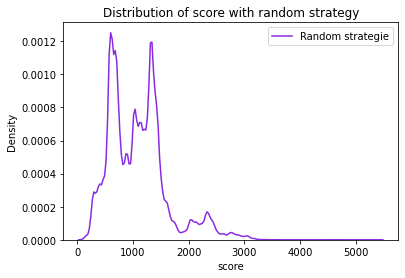

In [16]:
sns.kdeplot(score_random, bw_adjust=0.3, legend='Random strategy', color=random_color)
plt.legend(labels=['Random strategie', "Distribution of score with random strategy"])
plt.title("Distribution of score with random strategy")
plt.xlabel("score")


Text(0.5, 1.0, 'Distribution of max score')

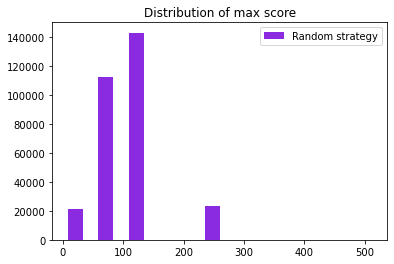

In [18]:
maxcell_random = np.loadtxt('../Game2048/Stats/Data/Storage_AI_maxcell_random.txt')
plt.hist(maxcell_random, label='Random strategy', bins=20, color=random_color)
plt.legend(loc='upper right')
plt.title("Distribution of max score")

We observe that the laws seem difficult to explain, the maximum value obtained on more than 300 000 games does not exceed 256.

### B. Clockwise strategy <a name="about"></a>
We will do the same analyse with this strategy. First we can notice that the rotation direction dont change the result.
Rotate in clockwise or the other way is the same.  
This is the last 4 movement strategy that we will observe. Analyse give us the following result:

In [19]:
clockwise_color = '#FF8C00'
score_clockwise = np.loadtxt('../Game2048/Stats/Data/Storage_AI_score_clockwise.txt')
empirical_mean_clockwise = np.mean(score_clockwise)
Variance_clockwise = 1/300000 * sum((score_clockwise - empirical_mean_clockwise)**2)
print(f'Empicial mean for random strategy is {empirical_mean_clockwise}')
print(f'The standard deviation of random strategy is {np.sqrt(Variance_clockwise)}')


Empicial mean for random strategy is 2309.6795333333334
The standard deviation of random strategy is 1081.9774647165598


Text(0.5, 0, 'score')

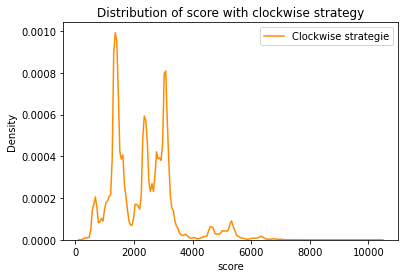

In [20]:
sns.kdeplot(score_clockwise, bw_adjust=0.3, legend='Clockwise strategy', color=clockwise_color)
plt.legend(labels=['Clockwise strategie', "Distribution of score with clockwise strategy"])
plt.title("Distribution of score with clockwise strategy")
plt.xlabel("score")

Text(0.5, 1.0, 'Distribution of max score')

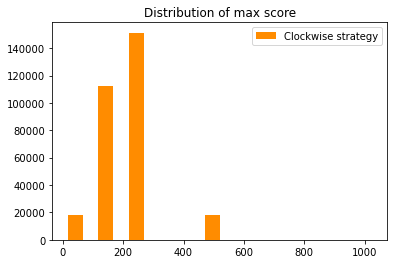

In [21]:
maxcell_clockwise = np.loadtxt('../Game2048/Stats/Data//Storage_AI_maxcell_clockwise.txt')
plt.hist(maxcell_clockwise, label='Clockwise strategy', bins=20, color=clockwise_color)
plt.legend(loc='upper right')
plt.title("Distribution of max score")

This strategy sems be more efficient than random the empirical mean is twice as hight as random strategy. (We observe the same for Standard deviation)  
Max cell reach here is 512, and the distribution is centred on higher value than random strategy. Clockwise are stronger than random for this game. 

Text(0.5, 0, 'score')

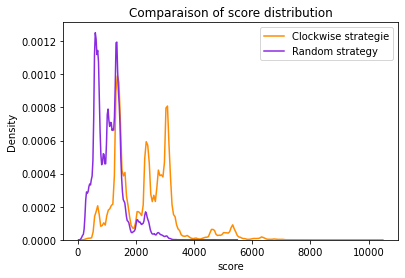

In [22]:
sns.kdeplot(score_clockwise, bw_adjust=0.3, legend='Clockwise strategy', color=clockwise_color)
sns.kdeplot(score_random, bw_adjust=0.3, legend='Random strategy', color=random_color)
plt.legend(labels=['Clockwise strategie','Random strategy' , "Comparaison of score distribution"])
plt.title("Comparaison of score distribution")
plt.xlabel("score")

### C. Two movement strategies <a name="about"></a>

In this part we will compare the opposite strategy againt adjacent strategy. Like clockwise strategy all symetrics moove have the same score distribution.  
With more precision do up/down is the same thing doing left/right and up/left give same score distribution thant doing down/left or up/right....  



Text(0.5, 0, 'score')

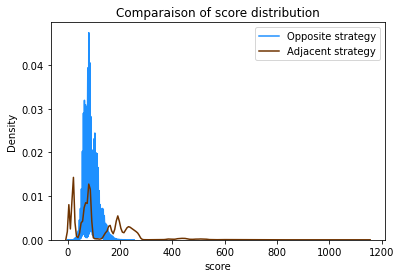

In [23]:
opposite_color = '#1E90FF'
adjacent_color = '#6e3300'
score_opposite = np.loadtxt('../Game2048/Stats/Data/Storage_AI_score_opposite.txt')
score_adjacent = np.loadtxt('../Game2048/Stats/Data/Storage_AI_score_adjacent.txt')
sns.kdeplot(score_opposite, bw_adjust=0.3, legend='Opposite strategy', color=opposite_color)
sns.kdeplot(score_adjacent, bw_adjust=0.3, legend='Adjacent strategy', color=adjacent_color)
plt.legend(labels=['Opposite strategy','Adjacent strategy' , "Comparaison of score distribution"])
plt.title("Comparaison of score distribution")
plt.xlabel("score")

In [24]:
score_opposite = np.loadtxt('../Game2048/Stats/Data/Storage_AI_score_opposite.txt')
empirical_mean_opposite = np.mean(score_opposite)
Variance_opposite = 1/300000 * sum((score_opposite - empirical_mean_opposite)**2)
print(f'Empicial mean for opposite strategy is {empirical_mean_opposite}')
print(f'The standard deviation of opposite strategy is {np.sqrt(Variance_opposite)}')

Empicial mean for opposite strategy is 88.01584
The standard deviation of opposite strategy is 25.253981648328352


In [26]:
score_adjacent = np.loadtxt('../Game2048/Stats/Data/Storage_AI_score_adjacent.txt')
empirical_mean_adjacent = np.mean(score_adjacent)
Variance_adjacent = 1/300000 * sum((score_adjacent - empirical_mean_adjacent)**2)
print(f'Empirical mean for adjacent strategy is {empirical_mean_adjacent}')
print(f'The standard deviation of adjacent strategy is {np.sqrt(Variance_adjacent)}')


Empirical mean for adjacent strategy is 120.45644
The standard deviation of adjacent strategy is 104.75321059133944


We observe that the opposite strategy give more predictable results than adjacent.  
The empirical mean is lower, about 32 less but has a standard deviation 4 times lower.  
Choosing the adjacent strategy seems more risky.


Text(0.5, 1.0, 'Distribution of max score')

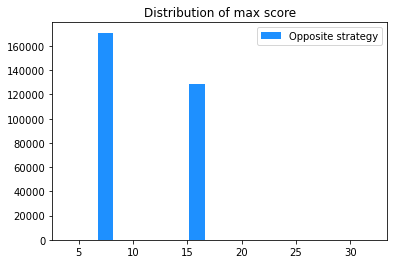

In [27]:
maxcell_opposite = np.loadtxt('../Game2048/Stats/Data/Storage_AI_maxcell_opposite.txt')
plt.hist(maxcell_opposite, label='Opposite strategy', bins=20, color=opposite_color)
plt.legend(loc='upper right')
plt.title("Distribution of max score")

Text(0.5, 1.0, 'Distribution of max score')

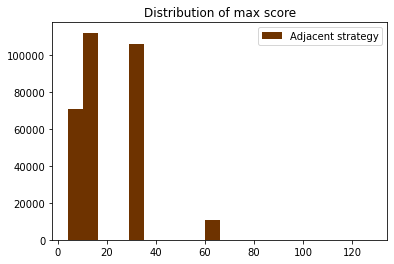

In [36]:
maxcell_adjacent = np.loadtxt('../Game2048/Stats/Data/Storage_AI_maxcell_adjacent.txt')
plt.hist(maxcell_adjacent, label='Adjacent strategy', bins=20, color=adjacent_color)
plt.legend(loc='upper right')
plt.title("Distribution of max score")

In [28]:
import pandas as pd
pd.read_csv("../Game2048/Stats/Data/results.txt")

,Empirical mean,CI 95% lower,CI 95% upper,maxcell
Random,1094.6,1092.7,1096.6,256
Clockwise,2309.6,2305.8,2313.5,512
Opposite,88.0,87.9,88.1,16
Adjacent,120.4,120.0,120.8,64


## 3. Conclusion <a name="gen"></a>

After all this plot we can get a classement of each strategies:  

1 - Clockwise  
2 - Random  
3 - adjacent  
4 - Opposite

We can observe a gap between 2 movement strategies and 4 movement strategies.   
This gap exist beacause when the IA use only two movement the game block frequently at the begining, this is beacause random of starting position.  
In the package you can use Makestats function to make your own result and compare them to the "real" value.